<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week08-workshop-2/ibm_attrition_nb_naive_bayes_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes and Logistic Regression with GridSearchCV on IBM Attrition Dataset
This notebook demonstrates how to train a classification model using both Naive Bayes and Logistic Regression on the same GridSearchCV pipeline. It includes:
- Data preprocessing
- Model training with `GridSearchCV`
- Performance evaluation using a confusion matrix and classification report.
- https://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html



In [1]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib seaborn


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Load the IBM attrition dataset
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/refs/heads/master/Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Preview the data
df.head()
print(df.shape)

# Convert 'Attrition' target to numerical: Yes -> 1, No -> 0
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop target from features
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)


(1470, 35)
(1176, 47)


In [8]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1097,24,350,21,2,1,1551,3,57,2,1,...,True,False,False,False,False,False,False,False,False,False
727,18,287,5,2,1,1012,2,73,3,1,...,False,False,False,False,True,False,False,False,True,False
254,29,1247,20,2,1,349,4,45,3,2,...,False,False,False,False,False,True,False,False,False,False
1175,39,492,12,3,1,1654,4,66,3,2,...,False,False,True,False,False,False,False,True,False,False
1341,31,311,20,3,1,1881,2,89,3,2,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Create a pipeline with both Naive Bayes and Logistic Regression
pipe = Pipeline([
    ('model', GaussianNB())  # Placeholder, will be replaced during grid search
])

# Define the parameter grid for both models
param_grid = [
    {'model': [GaussianNB()]},  # No hyperparameters to tune for GaussianNB
    {'model': [LogisticRegression(max_iter=1000)],
     'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength for LogisticRegression
     'model__solver': ['lbfgs', 'liblinear']}  # Solvers for LogisticRegression
]

# Perform GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model and its parameters
print(f"Best Model: {grid_search.best_estimator_}")
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]  # Probability of positive class

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

# AUC
roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Test Set Accuracy: {roc_auc_score}")


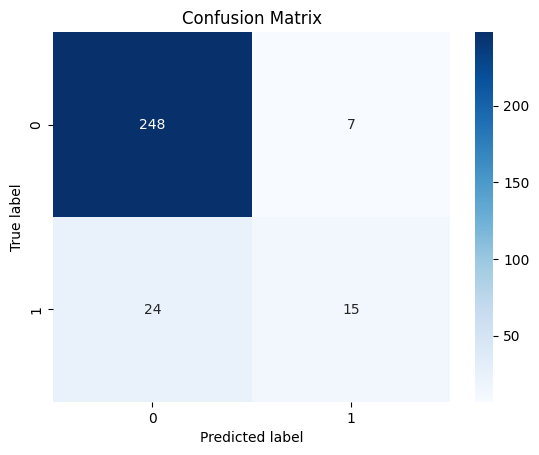

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.68      0.38      0.49        39

    accuracy                           0.89       294
   macro avg       0.80      0.68      0.72       294
weighted avg       0.88      0.89      0.88       294



In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




ROC AUC=0.802


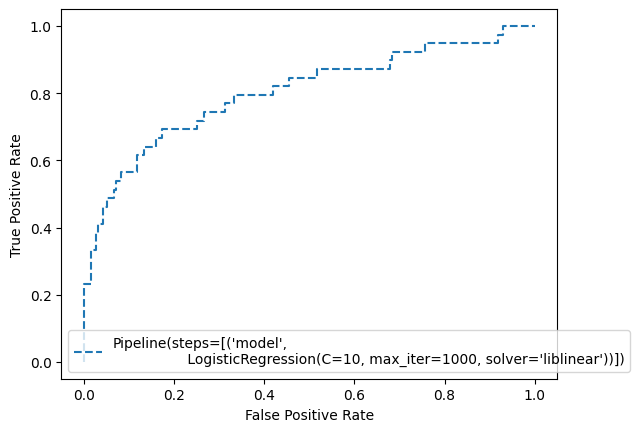

In [17]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
ns_auc = roc_auc_score(y_test, y_pred_proba)

# summarize scores
print('ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_proba)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label=grid_search.best_estimator_)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()